References
----------
[1] https://openstax.org/books/calculus-volume-1/pages/3-7-derivatives-of-inverse-functions
    
[2] Checkpoint 3.45
$$
\begin{equation}
g(x)=tan^{-1}x
\end{equation}
$$

SymPy version: 1.13.2
NumPy version: 1.26.4
Matplotlib version: 3.9.2

[atan(x_inverse)]
Lambda(x, atan(x))
x:[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
  2.   2.5  3.   3.5  4.   4.5  5. ]
y:[-1.37340076694502, -1.35212738092095, -1.32581766366803, -1.29249666778979, -1.24904577239825, -1.19028994968253, -1.10714871779409, -0.982793723247329, -0.785398163397448, -0.463647609000806, 0, 0.463647609000806, 0.785398163397448, 0.982793723247329, 1.10714871779409, 1.19028994968253, 1.24904577239825, 1.29249666778979, 1.32581766366803, 1.35212738092095, 1.37340076694502]
f′(x)=1/(x**2 + 1)
f′(2)=0.200000000000000
y_tangent:[-0.292851282205910 -0.192851282205910 -0.0928512822059098
 0.00714871779409032 0.107148717794090 0.207148717794090 0.307148717794090
 0.407148717794090 0.507148717794090 0.607148717794090 0.707148717794090
 0.807148717794090 0.907148717794090 1.00714871779409 1.10714871779409
 1.20714871779409 1.30714871779409 1.40714871779409 1.50714871779409


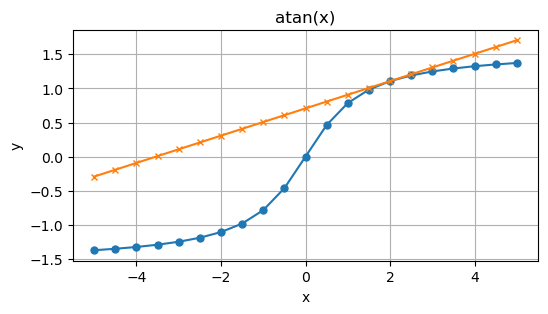

In [18]:
import sympy as sp
from sympy.abc import x
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

print(f"SymPy version: {sp.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print()

g = sp.tan(x)
x_inverse = sp.symbols("x_inverse")
inverses = sp.solve(sp.Eq(g, x_inverse), x)
print(inverses)
f = sp.Lambda(x, inverses[0].subs({"x_inverse": x}))
print(f)

x_values = np.linspace(-5, 5, 21)
print(f"x:{x_values}")


def map_x_values(x_value):
    result = f(x_value)
    if result == sp.zoo:
        return np.inf
    return result


y_values = list(map(map_x_values, x_values))
print(f"y:{y_values}")

f_prime = sp.diff(f(x), x)
print(f"f′(x)={f_prime}")

x_at = 2


def calculate_slope(derivative_fn, derivative_order=1):
    slope = derivative_fn.subs(x, x_at).evalf()
    apostrophe = "′" * derivative_order
    print(f"f{apostrophe}({x_at})={slope}")
    y_tangent = slope * (x_values - x_at) + f(x_at).evalf()
    print(f"y_tangent:{y_tangent}")
    return slope, y_tangent


slope, y_tangent = calculate_slope(f_prime)

figure, axes = plt.subplots(figsize=(6, 3))
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_title(f.expr)
axes.grid()
axes.plot(x_values, y_values, marker="o", markersize=5, label="f′")
axes.plot(x_values, y_tangent, marker="x", markersize=5, label="f′′")
plt.show()